Product Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61484 entries, 0 to 61483
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   cod_modelo_color               61484 non-null  object
 1   cod_color                      61366 non-null  object
 2   des_sex                        61484 non-null  object
 3   des_age                        61484 non-null  object
 4   des_line                       61484 non-null  object
 5   des_fabric                     61484 non-null  object
 6   des_product_category           61484 non-null  object
 7   des_product_aggregated_family  61484 non-null  object
 8   des_product_family             61484 non-null  object
 9   des_product_type               61484 non-null  object
 10  des_filename                   61484 non-null  object
 11  des_color                      61366 non-null  object
dtypes: object(12)
memory usage: 5.6+ MB
None


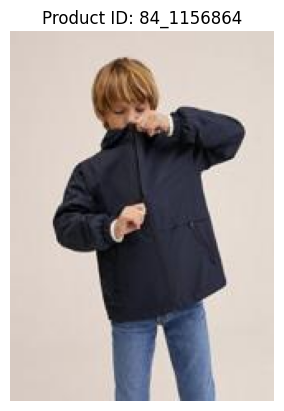

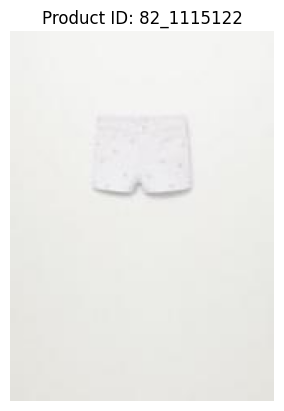

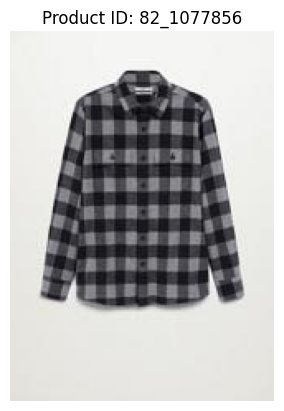

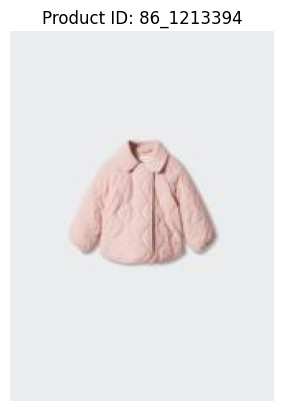

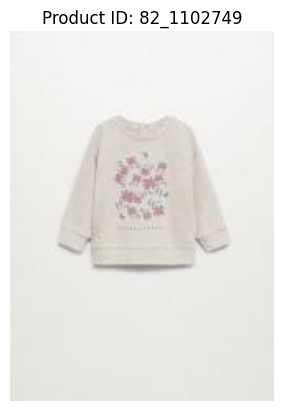

Column: cod_modelo_color
['83_1124642' '86_1215223' '84_1167695' '82_1108473' '83_1137778'
 '85_1188313' '82_1080107' '84_1162227' '84_1177833' '85_1190231']


Column: cod_color
['82' '01' '70' '37' '43' '56' '02' '76' '52' '36']


Column: des_sex
['Female' 'Male' 'Unisex']


Column: des_age
['Kids' 'Teen' 'Adult' 'Baby' 'Newborn']


Column: des_line
['KIDS' 'MAN' 'WOMAN']


Column: des_fabric
['TRICOT' 'WOVEN' 'CIRCULAR' 'JEANS' 'LEATHER' 'ACCESSORIES'
 'SYNTHETIC LEATHER']


Column: des_product_category
['Tops' 'Dresses, jumpsuits and Complete set' 'Bottoms' 'Outerwear'
 'Accesories, Swim and Intimate']


Column: des_product_aggregated_family
['Sweaters and Cardigans' 'Dresses and jumpsuits' 'T-shirts' 'Jeans'
 'Trousers & leggings' 'Shirts' 'Jackets and Blazers' 'Coats and Parkas'
 'Tops' 'Accessories']


Column: des_product_family
['Sweater' 'Dresses' 'T-shirt' 'Jeans' 'Sweatshirts'
 'Leggings and joggers' 'Shirt' 'Trousers' 'Blazers' 'Coats']


Column: des_product_type
['Sweater' 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Rutas a los datos
product_data_path = "../data/product_data.csv"
attributes_data_path = "../data/attribute_data.csv"
images_dir = "../data/train/images"

# Cargar datasets
product_data = pd.read_csv(product_data_path)
attributes_data = pd.read_csv(attributes_data_path)

# Inspección inicial
print("Product Data Info:")
print(product_data.info())
print("\nAttributes Data Info:")
print(attributes_data.info())

# Unir tablas, descartamos productos incompletos
merged_data = pd.merge(product_data, attributes_data, on="cod_modelo_color", how="inner")
print("\nMerged Data Shape:", merged_data.shape)

# Distribución de atributos
attribute_counts = attributes_data["attribute_name"].value_counts()
print("\nAttribute Counts:")
print(attribute_counts)

# Visualizar ejemplos de imágenes
sample_images = product_data.sample(5)
for _, row in sample_images.iterrows():
    image_path = os.path.join(images_dir, row["des_filename"])
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.title(f"Product ID: {row['cod_modelo_color']}")
    plt.axis("off")
    plt.show()

In [ ]:
for column in merged_data.columns:
    print(f"Column: {column}")
    print(merged_data[column].unique()[:10])  # Muestra los primeros 10 valores únicos
    print("\n")

print(merged_data.describe(include='all'))

for column in merged_data.columns:
    unique_values = merged_data[column].unique()
    print(f"Column: {column}")
    print(f"Number of unique values: {len(unique_values)}")
    if len(unique_values) <= 20:  # Mostrar categorías si hay menos de 20 valores únicos
        print(f"Unique values: {unique_values}")
    else:
        print(f"Too many unique values to display.")
    print("\n")


for column in merged_data.columns:
    print(f"Column: {column}")
    print(merged_data[column].value_counts().head(5))  # Muestra las 5 categorías más comunes
    print("\n")

# Ver valores únicos para columnas categóricas
for column in merged_data.columns:
    print(f"Column: {column}")
    print(f"Unique values: {merged_data[column].nunique()}")
    print(f"Most common values:\n{merged_data[column].value_counts().head(5)}\n")

Column: cod_modelo_color
['83_1124642' '86_1215223' '84_1167695' '82_1108473' '83_1137778'
 '85_1188313' '82_1080107' '84_1162227' '84_1177833' '85_1190231']


Column: cod_color
['82' '01' '70' '37' '43' '56' '02' '76' '52' '36']


Column: des_sex
['Female' 'Male' 'Unisex']


Column: des_age
['Kids' 'Teen' 'Adult' 'Baby' 'Newborn']


Column: des_line
['KIDS' 'MAN' 'WOMAN']


Column: des_fabric
['TRICOT' 'WOVEN' 'CIRCULAR' 'JEANS' 'LEATHER' 'ACCESSORIES'
 'SYNTHETIC LEATHER']


Column: des_product_category
['Tops' 'Dresses, jumpsuits and Complete set' 'Bottoms' 'Outerwear'
 'Accesories, Swim and Intimate']


Column: des_product_aggregated_family
['Sweaters and Cardigans' 'Dresses and jumpsuits' 'T-shirts' 'Jeans'
 'Trousers & leggings' 'Shirts' 'Jackets and Blazers' 'Coats and Parkas'
 'Tops' 'Accessories']


Column: des_product_family
['Sweater' 'Dresses' 'T-shirt' 'Jeans' 'Sweatshirts'
 'Leggings and joggers' 'Shirt' 'Trousers' 'Blazers' 'Coats']


Column: des_product_type
['Sweater' 

In [6]:
import pandas as pd

# Supongamos que `merged_data` es tu DataFrame preprocesado previamente.

# Paso 1: Verificar si hay valores faltantes en el DataFrame
missing_summary = merged_data.isnull().sum()  # Cuenta los valores faltantes por columna
total_rows = len(merged_data)  # Número total de filas

print("\nValores Faltantes por Columna:")
print(missing_summary)

# Paso 2: Calcular el porcentaje de valores faltantes
missing_percentage = (missing_summary / total_rows) * 100

print("\nPorcentaje de Valores Faltantes por Columna:")
print(missing_percentage)

# Paso 3: Eliminar columnas con un umbral alto de valores faltantes
# Aquí definimos un umbral del 50%, es decir, eliminaremos columnas donde más del 50% de los valores son faltantes.
threshold = 50.0  # Cambiar según tu criterio
columns_to_drop = missing_percentage[missing_percentage > threshold].index

print(f"\nColumnas a Eliminar (más del {threshold}% de valores faltantes): {list(columns_to_drop)}")

# Eliminamos las columnas identificadas
merged_data_cleaned = merged_data.drop(columns=columns_to_drop)

# Paso 4: Verificar nuevamente el estado del DataFrame
print("\nForma del DataFrame después de eliminar columnas con valores faltantes:", merged_data_cleaned.shape)

# Paso 5: Guardar o utilizar el DataFrame limpio
merged_data_cleaned.to_csv("preprocessed_data.csv", index=False)  # Si deseas guardar el DataFrame limpio



Valores Faltantes por Columna:
cod_modelo_color                   0
cod_color                        414
des_sex                            0
des_age                            0
des_line                           0
des_fabric                         0
des_product_category               0
des_product_aggregated_family      0
des_product_family                 0
des_product_type                   0
des_filename                       0
des_color                        414
attribute_name                     0
cod_value                          0
des_value                          0
dtype: int64

Porcentaje de Valores Faltantes por Columna:
cod_modelo_color                 0.000000
cod_color                        0.147934
des_sex                          0.000000
des_age                          0.000000
des_line                         0.000000
des_fabric                       0.000000
des_product_category             0.000000
des_product_aggregated_family    0.000000
des_product_family